In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv("loan_application_data.csv")

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())




       Unnamed: 0  ApplicantIncome  CoapplicantIncome  LoanAmount  \
count  500.000000       500.000000         500.000000  482.000000   
mean   249.500000      5493.644000        1506.307840  144.020747   
std    144.481833      6515.668972        2134.432188   82.344919   
min      0.000000       150.000000           0.000000   17.000000   
25%    124.750000      2874.500000           0.000000  100.000000   
50%    249.500000      3854.000000        1125.500000  126.500000   
75%    374.250000      5764.000000        2253.250000  161.500000   
max    499.000000     81000.000000       20000.000000  700.000000   

       Loan_Amount_Term  Credit_History  
count        486.000000      459.000000  
mean         342.543210        0.843137  
std           63.834977        0.364068  
min           12.000000        0.000000  
25%          360.000000        1.000000  
50%          360.000000        1.000000  
75%          360.000000        1.000000  
max          480.000000        1.000000  


In [5]:
df.nunique


<bound method DataFrame.nunique of      Unnamed: 0   Loan_ID  Gender Married Dependents     Education  \
0             0  LP001002    Male      No          0      Graduate   
1             1  LP001003    Male     Yes          1      Graduate   
2             2  LP001005    Male     Yes          0      Graduate   
3             3  LP001006    Male     Yes          0  Not Graduate   
4             4  LP001008    Male      No          0      Graduate   
..          ...       ...     ...     ...        ...           ...   
495         495  LP002586  Female     Yes          1      Graduate   
496         496  LP002587    Male     Yes          0  Not Graduate   
497         497  LP002588    Male     Yes          0      Graduate   
498         498  LP002600    Male     Yes          1      Graduate   
499         499  LP002602    Male      No          0      Graduate   

    Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0              No             5849                0.0  

In [6]:
df.shape

(500, 15)

In [7]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [8]:
df = df.drop(['Loan_ID','Unnamed: 0'],  axis=1)

In [9]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y,$4239.0
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural,Y,$4300.0
497,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y,$7482.0
498,Male,Yes,1,Graduate,Yes,2895,0.0,95.0,360.0,1.0,Semiurban,Y,$2895.0


In [10]:
df['Graduate']=df['Education'].apply(lambda x: True if x=='Graduate' else False)
df['Male']=df['Gender'].apply(lambda x: True if x=='Male' else False)
df['Married']=df['Married'].apply(lambda x: True if x=='Yes' else False)
df['Self_Employed']=df['Self_Employed'].apply(lambda x: True if x=='Yes' else False)

In [11]:
df = df.drop(['Education'],  axis=1)
df = df.drop(['Gender'],  axis=1)



In [12]:
df = pd.get_dummies(df, columns = ['Dependents', 'Property_Area'])

In [13]:
df.nunique()


Married                      2
Self_Employed                2
ApplicantIncome            415
CoapplicantIncome          235
LoanAmount                 179
Loan_Amount_Term            10
Credit_History               2
Loan_Status                  2
Total_Income               457
Graduate                     2
Male                         2
Dependents_0                 2
Dependents_1                 2
Dependents_2                 2
Dependents_3+                2
Property_Area_Rural          2
Property_Area_Semiurban      2
Property_Area_Urban          2
dtype: int64

In [14]:
df

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Graduate,Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,False,False,5849,0.0,NaN,360.0,1.0,Y,$5849.0,True,True,True,False,False,False,False,False,True
1,True,False,4583,1508.0,128.0,360.0,1.0,N,$6091.0,True,True,False,True,False,False,True,False,False
2,True,True,3000,0.0,66.0,360.0,1.0,Y,$3000.0,True,True,True,False,False,False,False,False,True
3,True,False,2583,2358.0,120.0,360.0,1.0,Y,$4941.0,False,True,True,False,False,False,False,False,True
4,False,False,6000,0.0,141.0,360.0,1.0,Y,$6000.0,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,True,False,3326,913.0,105.0,84.0,1.0,Y,$4239.0,True,False,False,True,False,False,False,True,False
496,True,False,2600,1700.0,107.0,360.0,1.0,Y,$4300.0,False,True,True,False,False,False,True,False,False
497,True,False,4625,2857.0,111.0,12.0,NaN,Y,$7482.0,True,True,True,False,False,False,False,False,True
498,True,True,2895,0.0,95.0,360.0,1.0,Y,$2895.0,True,True,False,True,False,False,False,True,False


In [15]:

df['Total_Income']=df['Total_Income'].apply(lambda x: float(x[1:]))

0, 1, 4583, 1508.0, 128.0, 360.0, 1.0, 1, 1, 0, 1, 6091.0, 0, 0, 1, 0, 0

In [16]:
df

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Graduate,Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,False,False,5849,0.0,NaN,360.0,1.0,Y,5849.0,True,True,True,False,False,False,False,False,True
1,True,False,4583,1508.0,128.0,360.0,1.0,N,6091.0,True,True,False,True,False,False,True,False,False
2,True,True,3000,0.0,66.0,360.0,1.0,Y,3000.0,True,True,True,False,False,False,False,False,True
3,True,False,2583,2358.0,120.0,360.0,1.0,Y,4941.0,False,True,True,False,False,False,False,False,True
4,False,False,6000,0.0,141.0,360.0,1.0,Y,6000.0,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,True,False,3326,913.0,105.0,84.0,1.0,Y,4239.0,True,False,False,True,False,False,False,True,False
496,True,False,2600,1700.0,107.0,360.0,1.0,Y,4300.0,False,True,True,False,False,False,True,False,False
497,True,False,4625,2857.0,111.0,12.0,NaN,Y,7482.0,True,True,True,False,False,False,False,False,True
498,True,True,2895,0.0,95.0,360.0,1.0,Y,2895.0,True,True,False,True,False,False,False,True,False


In [17]:
df['LoanAmount'].isnull().sum()

np.int64(18)

In [18]:
df=df[df['LoanAmount'].notna()]
df=df[df['Credit_History'].notna()]
df=df[df['Loan_Amount_Term'].notna()]




In [19]:
df

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Graduate,Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,True,False,4583,1508.0,128.0,360.0,1.0,N,6091.0,True,True,False,True,False,False,True,False,False
2,True,True,3000,0.0,66.0,360.0,1.0,Y,3000.0,True,True,True,False,False,False,False,False,True
3,True,False,2583,2358.0,120.0,360.0,1.0,Y,4941.0,False,True,True,False,False,False,False,False,True
4,False,False,6000,0.0,141.0,360.0,1.0,Y,6000.0,True,True,True,False,False,False,False,False,True
5,True,True,5417,4196.0,267.0,360.0,1.0,Y,9613.0,True,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,True,False,3597,2157.0,119.0,360.0,0.0,N,5754.0,True,True,True,False,False,False,True,False,False
495,True,False,3326,913.0,105.0,84.0,1.0,Y,4239.0,True,False,False,True,False,False,False,True,False
496,True,False,2600,1700.0,107.0,360.0,1.0,Y,4300.0,False,True,True,False,False,False,True,False,False
498,True,True,2895,0.0,95.0,360.0,1.0,Y,2895.0,True,True,False,True,False,False,False,True,False


In [20]:
df['Loan_Status']=df['Loan_Status'].apply(lambda x: True if x=='Y' else False)

In [21]:
x=df.drop('Loan_Status',axis=1).to_numpy()
y= df['Loan_Status'].to_numpy()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.5, random_state=25)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_clf = RandomForestClassifier()
rf_clf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
rf_clf_grid_search.fit(X_train, Y_train)

print(f"Best parameters: {rf_clf_grid_search.best_params_}")

Y_pred_rf = rf_clf_grid_search.best_estimator_.predict(X_test)

precision_rf = precision_score(Y_test, Y_pred_rf)
print(f"Random Forest Precision: {precision_rf}")

recall_rf = recall_score(Y_test, Y_pred_rf)
print(f"Random Forest Recall: {recall_rf}")

accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy Score: {accuracy_rf}")


f1_rf = f1_score(Y_test, Y_pred_rf)
print(f"Random Forest F1 Score: {f1_rf}")
    

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Precision: 0.8076923076923077
Random Forest Recall: 0.8289473684210527
Random Forest Accuracy Score: 0.7383177570093458
Random Forest F1 Score: 0.8181818181818182


c:\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [23]:
df

,Married,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Graduate,Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,True,False,4583,1508.0,128.0,360.0,1.0,False,6091.0,True,True,False,True,False,False,True,False,False
2,True,True,3000,0.0,66.0,360.0,1.0,True,3000.0,True,True,True,False,False,False,False,False,True
3,True,False,2583,2358.0,120.0,360.0,1.0,True,4941.0,False,True,True,False,False,False,False,False,True
4,False,False,6000,0.0,141.0,360.0,1.0,True,6000.0,True,True,True,False,False,False,False,False,True
5,True,True,5417,4196.0,267.0,360.0,1.0,True,9613.0,True,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,True,False,3597,2157.0,119.0,360.0,0.0,False,5754.0,True,True,True,False,False,False,True,False,False
495,True,False,3326,913.0,105.0,84.0,1.0,True,4239.0,True,False,False,True,False,False,False,True,False
496,True,False,2600,1700.0,107.0,360.0,1.0,True,4300.0,False,True,True,False,False,False,True,False,False
498,True,True,2895,0.0,95.0,360.0,1.0,True,2895.0,True,True,False,True,False,False,False,True,False


In [24]:
# import joblib
# joblib.dump(rf_clf_grid_search,"Model_rf_clf_hyp.pkl")

In [25]:
rf_clf_grid_search.predict([[0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,6091.0,0,0,1,0,0]])[0]

np.False_

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score



arf_clf = RandomForestClassifier()

arf_clf.fit(X_train, Y_train)

print(f"Best parameters: {arf_clf}")

Y_pred_arf = arf_clf.predict(X_test)

precision_arf = precision_score(Y_test, Y_pred_arf)
print(f"Random Forest Precision: {precision_arf}")

recall_arf = recall_score(Y_test, Y_pred_arf)
print(f"Random Forest Recall: {recall_arf}")

accuracy_arf = accuracy_score(Y_test, Y_pred_arf)
print(f"Random Forest Accuracy Score: {accuracy_arf}")


f1_arf = f1_score(Y_test, Y_pred_arf)
print(f"Random Forest F1 Score: {f1_arf}")
    

Best parameters: RandomForestClassifier()
Random Forest Precision: 0.8242424242424242
Random Forest Recall: 0.8947368421052632
Random Forest Accuracy Score: 0.7897196261682243
Random Forest F1 Score: 0.8580441640378549


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [28]:
clf.predict([[0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,6091.0,0,0,1,0,0]])[0]



np.False_

precison and recall

In [29]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
Y_pred = clf.predict(X_test)
Y_pred = Y_pred.astype(int)
print(f"Unique values in Y_test: {np.unique(Y_test)}")
print(f"Unique values in Y_pred: {np.unique(Y_pred)}")
precision = precision_score(Y_test, Y_pred)
print(f"Precision: {precision}")

recall = recall_score(Y_test, Y_pred)
print(f"Recall: {recall}")

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy score: {accuracy}")

Unique values in Y_test: [False  True]
Unique values in Y_pred: [0 1]
Precision: 0.8202247191011236
Recall: 0.9605263157894737
Accuracy score: 0.822429906542056


In [30]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
# from sklearn.metrics import precision_score, recall_score, accuracy_score
# import numpy as np
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }
# clf = SVC()
# grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X_train, Y_train)
# best_params = grid_search.best_params_
# best_clf = grid_search.best_estimator_
# print(f"Best Parameters: {best_params}")
# Y_pred = best_clf.predict(X_test)
# Y_pred = Y_pred.astype(int)
# print(f"Unique values in Y_test: {np.unique(Y_test)}")
# print(f"Unique values in Y_pred: {np.unique(Y_pred)}")
# precision = precision_score(Y_test, Y_pred)
# print(f"Precision: {precision}")

# recall = recall_score(Y_test, Y_pred)
# print(f"Recall: {recall}")

# accuracy = accuracy_score(Y_test, Y_pred)
# print(f"Accuracy score: {accuracy}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Unique values in Y_test: [False  True]
Unique values in Y_pred: [1]
Precision: 0.7102803738317757
Recall: 1.0
Accuracy score: 0.7102803738317757

In [31]:
# grid_search.predict([[0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,6091.0,0,0,1,0,0]])[0]



In [32]:
# import joblib
# joblib.dump(grid_search,"Model_lda.pkl")

In [33]:
# from sklearn.metrics import roc_curve
# import matplotlib.pyplot as plt

# fpr, tpr, _ = roc_curve(Y_test, Y_pred)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label='ROC Curve')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
# plt.title('Receiver Operating Characteristic Curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid(True)
# plt.legend()
# plt.show()


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

logreg = LogisticRegression()


logreg.fit(X_train, Y_train)


Y_pred_logreg = logreg.predict(X_test)


precision_logreg = precision_score(Y_test, Y_pred_logreg)
print(f"Logistic Regression Precision: {precision_logreg}")


recall_logreg = recall_score(Y_test, Y_pred_logreg)
print(f"Logistic Regression Recall: {recall_logreg}")


accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
print(f"Logistic Regression Accuracy Score: {accuracy_logreg}")


Logistic Regression Precision: 0.8255813953488372
Logistic Regression Recall: 0.9342105263157895
Logistic Regression Accuracy Score: 0.8130841121495327


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
logreg.predict([[0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,6091.0,0,0,1,0,0]])[0]

np.False_

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score


dtc = DecisionTreeClassifier(random_state=42)  


dtc.fit(X_train, Y_train)




Y_pred_dtc = dtc.predict(X_test)


precision_dtc = precision_score(Y_test, Y_pred_dtc)
print(f"Decision Tree Classifier Precision: {precision_dtc}")


recall_dtc = recall_score(Y_test, Y_pred_dtc)
print(f"Decision Tree Classifier Recall: {recall_dtc}")

accuracy_dtc = accuracy_score(Y_test, Y_pred_dtc)
print(f"Decision Tree Classifier Accuracy Score: {accuracy_dtc}")


Decision Tree Classifier Precision: 0.7735849056603774
Decision Tree Classifier Recall: 0.8092105263157895
Decision Tree Classifier Accuracy Score: 0.6962616822429907


In [37]:
dtc.predict([[0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,6091.0,0,0,1,0,0]])[0]

np.False_

In [38]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# rf_clf = RandomForestClassifier()
# rf_clf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
# rf_clf_grid_search.fit(X_train, Y_train)

# print(f"Best parameters: {rf_clf_grid_search.best_params_}")

# Y_pred_rf = rf_clf_grid_search.best_estimator_.predict(X_test)

# precision_rf = precision_score(Y_test, Y_pred_rf)
# print(f"Random Forest Precision: {precision_rf}")

# recall_rf = recall_score(Y_test, Y_pred_rf)
# print(f"Random Forest Recall: {recall_rf}")

# accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
# print(f"Random Forest Accuracy Score: {accuracy_rf}")


# f1_rf = f1_score(Y_test, Y_pred_rf)
# print(f"Random Forest F1 Score: {f1_rf}")
    

In [39]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [40]:
df.groupby("Graduate").size()

Graduate
False     86
True     342
dtype: int64

In [41]:
df.groupby("Married").size()

Married
False    156
True     272
dtype: int64

In [42]:
df.groupby("Male").size()

Male
False     85
True     343
dtype: int64

In [43]:



females_df = df[df['Male'] == 0]


acceptance_rate_female = females_df['Loan_Status'].mean() * 100


print(f"Acceptance Rate for Females: {acceptance_rate_female:.2f}%")


Acceptance Rate for Females: 62.35%


In [44]:



males_df = df[df['Male'] == 1]


acceptance_rate_male = males_df['Loan_Status'].mean() * 100


print(f"Acceptance Rate for males: {acceptance_rate_male:.2f}%")


Acceptance Rate for males: 70.55%


In [45]:



Graduate_df = df[df['Graduate'] == 1]


acceptance_rate_graduate = Graduate_df['Loan_Status'].mean() * 100


print(f"Acceptance Rate for Graduate applicants: {acceptance_rate_graduate:.2f}%")


Acceptance Rate for Graduate applicants: 70.76%


In [46]:



Non_Graduate_df = df[df['Graduate'] == 0]


acceptance_rate_Non_graduate = Non_Graduate_df['Loan_Status'].mean() * 100


print(f"Acceptance Rate for Graduate applicants: {acceptance_rate_Non_graduate:.2f}%")


Acceptance Rate for Graduate applicants: 61.63%


In [47]:
df.groupby("Loan_Status").size()



Loan_Status
False    133
True     295
dtype: int64

In [48]:



prediction = rf_clf_grid_search.best_estimator_.predict([[0, 1, 4583, 1508.0, 128.0, 360.0, 1.0, 1, 1, 0, 1, 6091.0, 0, 0, 1, 0, 0]])[0]

print(prediction)


False


In [49]:
import joblib
joblib.dump(rf_clf_grid_search,"Model_rf_clf.pkl")

['Model_rf_clf.pkl']

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)

KNN = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
NB  = GaussianNB()
SVM = SVC(gamma='auto')

In [51]:
LR.fit(X_train, Y_train)


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='auto')

In [52]:

KNN.fit(X_train, Y_train)


KNeighborsClassifier()

In [53]:

DTC.fit(X_train, Y_train)


DecisionTreeClassifier()

In [54]:
NB.fit(X_train, Y_train)


GaussianNB()

In [55]:
SVM.fit(X_train, Y_train)

SVC(gamma='auto')

In [56]:


accuracy_score_KNN = accuracy_score(Y_test, KNN.predict(X_test))

accuracy_score_NB = accuracy_score(Y_test, NB.predict(X_test))
accuracy_score_SVM = accuracy_score(Y_test, SVM.predict(X_test))


print(f"KNN Accuracy Score: {accuracy_score_KNN}")

print(f"NB Accuracy Score: {accuracy_score_NB}")
print(f"SVM Accuracy Score: {accuracy_score_SVM}")


KNN Accuracy Score: 0.6495327102803738
NB Accuracy Score: 0.7897196261682243
SVM Accuracy Score: 0.7102803738317757


In [57]:
from sklearn.metrics import confusion_matrix, classification_report



print("confusion matrix:")
print(confusion_matrix(Y_test, LR.predict(X_test)))

print("classficatton report:")
print(classification_report(Y_test, LR.predict(X_test)))

confusion matrix:
[[ 32  30]
 [ 11 141]]
classficatton report:
              precision    recall  f1-score   support

       False       0.74      0.52      0.61        62
        True       0.82      0.93      0.87       152

    accuracy                           0.81       214
   macro avg       0.78      0.72      0.74       214
weighted avg       0.80      0.81      0.80       214



In [58]:
from sklearn.metrics import confusion_matrix, classification_report



print("confusion matrix:")
print(confusion_matrix(Y_test, SVM.predict(X_test)))

print("classficatton report:")
print(classification_report(Y_test, SVM.predict(X_test)))

confusion matrix:
[[  0  62]
 [  0 152]]
classficatton report:
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        62
        True       0.71      1.00      0.83       152

    accuracy                           0.71       214
   macro avg       0.36      0.50      0.42       214
weighted avg       0.50      0.71      0.59       214



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print("confusion matrix:")
print(confusion_matrix(Y_test, NB.predict(X_test)))

print("classficatton report:")
print(classification_report(Y_test, NB.predict(X_test)))

confusion matrix:
[[ 27  35]
 [ 10 142]]
classficatton report:
              precision    recall  f1-score   support

       False       0.73      0.44      0.55        62
        True       0.80      0.93      0.86       152

    accuracy                           0.79       214
   macro avg       0.77      0.68      0.70       214
weighted avg       0.78      0.79      0.77       214



In [60]:
from sklearn.metrics import confusion_matrix, classification_report
print("confusion matrix:")
print(confusion_matrix(Y_test, DTC.predict(X_test)))

print("classficatton report:")
print(classification_report(Y_test, DTC.predict(X_test)))

confusion matrix:
[[ 27  35]
 [ 29 123]]
classficatton report:
              precision    recall  f1-score   support

       False       0.48      0.44      0.46        62
        True       0.78      0.81      0.79       152

    accuracy                           0.70       214
   macro avg       0.63      0.62      0.63       214
weighted avg       0.69      0.70      0.70       214



In [61]:
from sklearn.metrics import confusion_matrix, classification_report
print("confusion matrix:")
print(confusion_matrix(Y_test, KNN.predict(X_test)))

print("classficatton report:")
print(classification_report(Y_test, KNN.predict(X_test)))

confusion matrix:
[[ 18  44]
 [ 31 121]]
classficatton report:
              precision    recall  f1-score   support

       False       0.37      0.29      0.32        62
        True       0.73      0.80      0.76       152

    accuracy                           0.65       214
   macro avg       0.55      0.54      0.54       214
weighted avg       0.63      0.65      0.64       214



Number of features in 'feature_names': 17
Number of features in 'feature_importances': 17


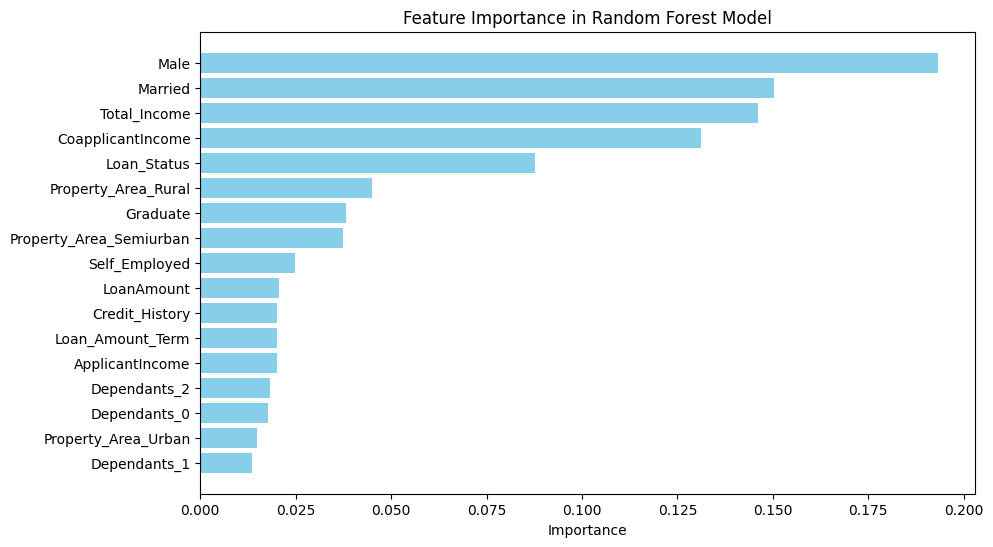

Importance of 'Male' feature: 0.19334907629997197
'Male' is an important feature with an importance of 0.1933.
Importance of 'Graduate' feature: 0.03826249772581196
'Graduate' is an important feature with an importance of 0.0383.


In [62]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Status','Married', 'Graduate', 'Male', 'Total_Income', 'LoanAmount', "Loan_Amount_Term","Credit_History","Dependants_0","Dependants_1","Dependants_2","Property_Area_Rural","Property_Area_Semiurban","Property_Area_Urban"]

feature_importances = rf_clf_grid_search.best_estimator_.feature_importances_

print(f"Number of features in 'feature_names': {len(feature_names)}")
print(f"Number of features in 'feature_importances': {len(feature_importances)}")

if len(feature_names) != len(feature_importances):
    raise ValueError(f"Mismatch in the number of features. 'feature_names' has {len(feature_names)} features, but 'feature_importances' has {len(feature_importances)} features.")

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  
plt.show()

if 'Male' in importance_df['Feature'].values:
    male_importance = importance_df[importance_df['Feature'] == 'Male']['Importance'].values[0]
    print(f"Importance of 'Male' feature: {male_importance}")
    if male_importance > 0:
        print(f"'Male' is an important feature with an importance of {male_importance:.4f}.")
    else:
        print(f"'Male' is not an important feature (importance: {male_importance:.4f}).")
else:
    print("'Male' feature is not present in the model.")

if 'Graduate' in importance_df['Feature'].values:
    graduate_importance = importance_df[importance_df['Feature'] == 'Graduate']['Importance'].values[0]
    print(f"Importance of 'Graduate' feature: {graduate_importance}")
    if graduate_importance > 0:
        print(f"'Graduate' is an important feature with an importance of {graduate_importance:.4f}.")
    else:
        print(f"'Graduate' is not an important feature (importance: {graduate_importance:.4f}).")
else:
    print("'Graduate' feature is not present in the model.")


In [63]:
gender_checker=df.groupby('Male').sample(85)



x=gender_checker.drop('Loan_Status',axis=1).to_numpy()
y= gender_checker['Loan_Status'].to_numpy()

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.5, random_state=25)

In [64]:
from sklearn.metrics import precision_score, recall_score, accuracy_score


gtc = RandomForestClassifier() 


gtc.fit(X_train, Y_train)


Y_pred_gtc = gtc.predict(X_test)


precision_gtc = precision_score(Y_test, Y_pred_gtc)
print(f"Random Forest Classifier Precision: {precision_gtc}")


recall_gtc = recall_score(Y_test, Y_pred_gtc)
print(f"Random Forest Classifier Recall: {recall_gtc}")

accuracy_gtc = accuracy_score(Y_test, Y_pred_gtc)
print(f"Random Forest Classifier Accuracy Score: {accuracy_gtc}")

Random Forest Classifier Precision: 0.7083333333333334
Random Forest Classifier Recall: 0.9444444444444444
Random Forest Classifier Accuracy Score: 0.7176470588235294


In [65]:


gtc

RandomForestClassifier()

Number of features in 'feature_names': 17
Number of features in 'feature_importances': 17


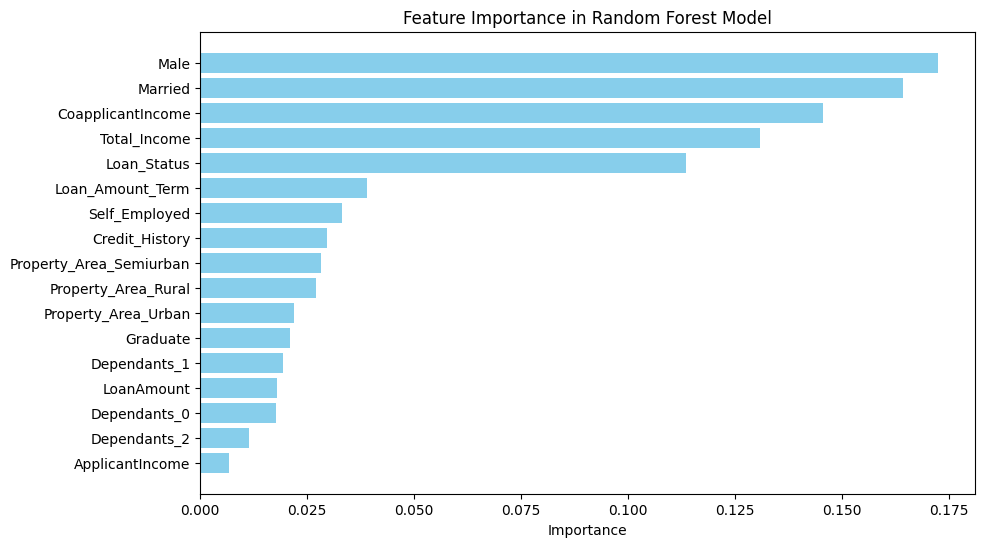

Importance of 'Male' feature: 0.17248888879289812
'Male' is an important feature with an importance of 0.1725.


In [66]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Status','Married', 'Graduate', 'Male', 'Total_Income', 'LoanAmount', "Loan_Amount_Term","Credit_History","Dependants_0","Dependants_1","Dependants_2","Property_Area_Rural","Property_Area_Semiurban","Property_Area_Urban"]

feature_importances = gtc.feature_importances_

print(f"Number of features in 'feature_names': {len(feature_names)}")
print(f"Number of features in 'feature_importances': {len(feature_importances)}")

if len(feature_names) != len(feature_importances):
    raise ValueError(f"Mismatch in the number of features. 'feature_names' has {len(feature_names)} features, but 'feature_importances' has {len(feature_importances)} features.")

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  
plt.show()

if 'Male' in importance_df['Feature'].values:
    male_importance = importance_df[importance_df['Feature'] == 'Male']['Importance'].values[0]
    print(f"Importance of 'Male' feature: {male_importance}")
    if male_importance > 0:
        print(f"'Male' is an important feature with an importance of {male_importance:.4f}.")
    else:
        print(f"'Male' is not an important feature (importance: {male_importance:.4f}).")
else:
    print("'Male' feature is not present in the model.")




In [67]:



females_gtc = gender_checker[gender_checker['Male'] == 0]


acceptance_rate_female = females_gtc['Loan_Status'].mean() * 100


print(f"Acceptance Rate for Females: {acceptance_rate_female:.2f}%")






Acceptance Rate for Females: 62.35%


In [68]:
males_gtc = gender_checker[gender_checker['Male'] == 1]


acceptance_rate_male = males_gtc['Loan_Status'].mean() * 100


print(f"Acceptance Rate for males: {acceptance_rate_male:.2f}%")


Acceptance Rate for males: 69.41%
